**Лабораторная работа № 1. Регрессия на основе нейронных сетей**

Калинина Е.А.

1. Написать какую задачу вы будете решать на словах и какую колонку будет прогнозировать ваша модель. Смотрим в файлик readme.md (я проверил, там всё есть или там есть доп файлик с описанием колонок)

Вариант: 5. Решается регрессионная задача предсказания стоимости страхового возмещения, в таблице представленная колонкой loss.

##Просмотр данных

2. Выполнить команды: head, tail, info, describe, shape на каждом наборе и на тесте и на обучении.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train=pd.read_csv('drive/MyDrive/train.csv')
test=pd.read_csv('drive/MyDrive/test.csv')

In [ ]:

#первые 5 строк
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [ ]:

#последние 5 строк
train.tail()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
188313,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87
188317,587633,B,A,A,B,A,A,A,A,A,...,0.844563,0.533048,0.97123,0.93383,0.83814,0.932195,0.946432,0.810511,0.721460,4751.72


In [ ]:
test.tail()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
125541,587617,A,A,A,B,A,A,A,A,A,...,0.281143,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946
125542,587621,A,A,A,A,B,B,A,B,A,...,0.674529,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576
125543,587627,B,B,A,A,B,A,A,A,B,...,0.794794,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125
125544,587629,A,A,A,A,A,B,A,B,A,...,0.302678,0.372125,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542
125545,587634,A,B,A,A,A,A,A,A,B,...,0.413817,0.221699,0.242044,0.25461,0.31399,0.25183,0.245410,0.241676,0.287682,0.220323


In [ ]:

#информация по колонкам
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Data columns (total 132 columns):
 #    Column  Dtype  
---   ------  -----  
 0    id      int64  
 1    cat1    object 
 2    cat2    object 
 3    cat3    object 
 4    cat4    object 
 5    cat5    object 
 6    cat6    object 
 7    cat7    object 
 8    cat8    object 
 9    cat9    object 
 10   cat10   object 
 11   cat11   object 
 12   cat12   object 
 13   cat13   object 
 14   cat14   object 
 15   cat15   object 
 16   cat16   object 
 17   cat17   object 
 18   cat18   object 
 19   cat19   object 
 20   cat20   object 
 21   cat21   object 
 22   cat22   object 
 23   cat23   object 
 24   cat24   object 
 25   cat25   object 
 26   cat26   object 
 27   cat27   object 
 28   cat28   object 
 29   cat29   object 
 30   cat30   object 
 31   cat31   object 
 32   cat32   object 
 33   cat33   object 
 34   cat34   object 
 35   cat35   object 
 36   cat36   object 
 37   cat37   object 
 38   ca

In [ ]:
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Data columns (total 131 columns):
 #    Column  Dtype  
---   ------  -----  
 0    id      int64  
 1    cat1    object 
 2    cat2    object 
 3    cat3    object 
 4    cat4    object 
 5    cat5    object 
 6    cat6    object 
 7    cat7    object 
 8    cat8    object 
 9    cat9    object 
 10   cat10   object 
 11   cat11   object 
 12   cat12   object 
 13   cat13   object 
 14   cat14   object 
 15   cat15   object 
 16   cat16   object 
 17   cat17   object 
 18   cat18   object 
 19   cat19   object 
 20   cat20   object 
 21   cat21   object 
 22   cat22   object 
 23   cat23   object 
 24   cat24   object 
 25   cat25   object 
 26   cat26   object 
 27   cat27   object 
 28   cat28   object 
 29   cat29   object 
 30   cat30   object 
 31   cat31   object 
 32   cat32   object 
 33   cat33   object 
 34   cat34   object 
 35   cat35   object 
 36   cat36   object 
 37   cat37   object 
 38   ca

In [ ]:

#статистика
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,125546.0,294067.153442,170098.335649,4.000000,146414.250000,294306.000000,441800.000000,587634.000000
cont1,125546.0,0.494447,0.187961,0.000016,0.347403,0.475784,0.626630,0.984975
cont2,125546.0,0.506939,0.206837,0.001149,0.358319,0.555782,0.681761,0.862654
cont3,125546.0,0.498255,0.201746,0.002634,0.336963,0.527991,0.634224,0.944251
cont4,125546.0,0.492334,0.210815,0.176921,0.327354,0.452887,0.652072,0.956046
cont5,125546.0,0.487640,0.209119,0.281143,0.281143,0.422268,0.643315,0.983107
cont6,125546.0,0.492188,0.205574,0.012683,0.336105,0.441525,0.659261,0.997162
cont7,125546.0,0.485945,0.178650,0.069503,0.352087,0.438893,0.591284,1.000000
cont8,125546.0,0.487401,0.199549,0.236880,0.317960,0.441060,0.629180,0.982800
cont9,125546.0,0.486015,0.182134,0.000080,0.358970,0.441450,0.568890,0.995400


In [ ]:

#кол-во строк и столбцов
train.shape, test.shape

((188318, 132), (125546, 131))

##Обработка

3. Преобразование данных

Удаление пропусков

In [ ]:
train=train.replace(['','-','?',' '],np.nan)
test=test.replace(['','-','?',' '],np.nan)

In [ ]:
any(train.isna().sum()),any(test.isna().sum())

(False, False)

Пропусков нет.

In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
test.duplicated().sum()

np.int64(0)

Дубликатов нет.

Обработка категориальных признаков

In [24]:
cols=train.columns.tolist()
cat=cols[1:117] #без id
num=cols[117:-1] #без loss

In [25]:
uniqs=train[cat].nunique()
uniqs.unique() #кол-во категорий

array([  2,   3,   4,   8,   7,   5,  16,  15,  19,   9,  13,  17,  20,
        11,  84, 131,  51,  61,  23, 326])

<10 значений - OHE, иначе OrdinalEncoder (в отличие от LabelEncoder сохраняет порядковую информацию). Нормируем числовые признаки через StandardScaler. Колонок id и loss нет в cat и num, так что они дропаются.

In [26]:
cat_few=uniqs[uniqs<10].index
cat_lot=uniqs[uniqs>9].index

In [27]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#в тесте нет loss
x_train, x_test, y_train, y_test = train_test_split(train.drop(['loss'],axis=1), train.loss)

sc = StandardScaler()
y_train_scaled=sc.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled=sc.transform(y_test.values.reshape(-1,1))

In [28]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False), cat_few),
     ('label_enc', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), cat_lot),
     ('scaler',StandardScaler(), num)])

processed = pd.DataFrame(ct.fit_transform(x_train),
                         columns=ct.get_feature_names_out(),
                         index=x_train.index)

In [11]:
processed.head(3)

,ohe__cat1_B,ohe__cat2_B,ohe__cat3_B,ohe__cat4_B,ohe__cat5_B,ohe__cat6_B,ohe__cat7_B,ohe__cat8_B,ohe__cat9_B,ohe__cat10_B,...,scaler__cont5,scaler__cont6,scaler__cont7,scaler__cont8,scaler__cont9,scaler__cont10,scaler__cont11,scaler__cont12,scaler__cont13,scaler__cont14
59436,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.357704,-1.054080,-0.333850,-0.629984,-0.567646,-1.010647,-1.544170,-1.551577,-0.941689,1.238277
150429,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.431946,2.227935,1.019621,0.485506,2.699859,1.810595,2.104764,2.191820,1.786709,0.819914
84179,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.311408,-0.514794,-0.532749,0.249496,-0.322688,0.129413,-0.962628,-0.987054,-0.967524,-1.233458


Рассмотрим корреляцию между признаками. Т.к. обработка всего датасета займет много времени, возьмём выборку в 50.000 строк.

In [29]:
import seaborn as sns
sample_train=processed.sample(50000)
corr=sample_train.corr().abs()
corr.loc[:,:]=np.tril(corr.values,k=-1)
corr=corr[corr>0]

In [30]:
rates=corr.unstack().sort_values(kind="quicksort",ascending=False)[:15]
rates

ohe__cat73_C    ohe__cat92_I      1.000000
                ohe__cat74_C      1.000000
ohe__cat74_C    ohe__cat92_I      1.000000
                ohe__cat91_H      1.000000
ohe__cat73_C    ohe__cat91_H      1.000000
ohe__cat91_H    ohe__cat92_I      1.000000
ohe__cat89_I    ohe__cat90_G      1.000000
ohe__cat86_C    ohe__cat98_E      0.996443
scaler__cont11  scaler__cont12    0.994242
ohe__cat76_C    ohe__cat77_D      0.971353
ohe__cat7_B     ohe__cat89_B      0.969800
ohe__cat93_C    ohe__cat93_D      0.963269
ohe__cat3_B     ohe__cat90_B      0.960849
ohe__cat80_B    ohe__cat80_D      0.941259
ohe__cat2_B     ohe__cat9_B       0.933703
dtype: float64

Дропнем колонки с корреляцией>95.

In [31]:
to_drop=rates[:13].index.get_level_values(0).unique().tolist()

In [32]:
processed=processed.drop(to_drop,axis=1)

Обработка теста

In [33]:
proc_test=pd.DataFrame(ct.transform(x_test),
                         columns=ct.get_feature_names_out(),
                         index=x_test.index)
proc_test=proc_test.drop(to_drop,axis=1)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [74] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [34]:
processed.shape,proc_test.shape

((141238, 201), (47080, 201))

In [29]:
#На случай неизвестных в OrdinalEncoder
proc_test[proc_test.iloc[:,117:]==-1].dropna()

,ohe__cat1_B,ohe__cat2_B,ohe__cat4_B,ohe__cat5_B,ohe__cat6_B,ohe__cat8_B,ohe__cat9_B,ohe__cat10_B,ohe__cat11_B,ohe__cat12_B,...,scaler__cont4,scaler__cont5,scaler__cont6,scaler__cont7,scaler__cont8,scaler__cont9,scaler__cont10,scaler__cont12,scaler__cont13,scaler__cont14


##Keras

4. Строите полносвязную модель keras, можете добавить drop-out слои. Архитектура модели может быть любой, главное чтобы обучалась не слишком долго. Найдите баланс между качеством ответа и сложностью модели (начинайте с чего-то простого и усложняйте). При обучении вам нужно включить валидацию. Обучение должно проходить в 100 эпох. В конце обучения оцените переобучилась модель или нет (если на валидации качество не улучшается, а на тесте улучшается, то скорее всего переобучается)

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
model = keras.Sequential(
    [
        layers.Dense(64, activation='relu', input_shape=(processed.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='mse',
    metrics=['root_mean_squared_error'],
)

In [38]:
callbacks = [
    #сохраняет веса с наименьшим RMSE
    keras.callbacks.ModelCheckpoint(
        'model_lb1.keras',
        save_best_only=True,
        monitor='val_root_mean_squared_error',
        mode='min'),
    #уменьшает lr, если loss перестает снижаться
    keras.callbacks.ReduceLROnPlateau(
        patience=10,
        factor=0.5,
        min_lr=1e-7
    )
]

In [39]:
history = model.fit(
    processed[:50000], #для ускорения тренировки уменьшим размер датасета
    y_train_scaled[:50000],
    batch_size=64,
    epochs=100,
    validation_data=(proc_test, y_test_scaled),
    callbacks=callbacks
)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 10.4799 - root_mean_squared_error: 2.7508 - val_loss: 0.6388 - val_root_mean_squared_error: 0.7993 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6514 - root_mean_squared_error: 0.8051 - val_loss: 0.5375 - val_root_mean_squared_error: 0.7331 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5371 - root_mean_squared_error: 0.7324 - val_loss: 0.5055 - val_root_mean_squared_error: 0.7110 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5046 - root_mean_squared_error: 0.7102 - val_loss: 0.5164 - val_root_mean_squared_error: 0.7186 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4984 - root_mean_squared_error: 0.7058 - val_loss: 0.4952 - val_root_mean_squared_error: 0.7037 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5129 - root_mean_squa

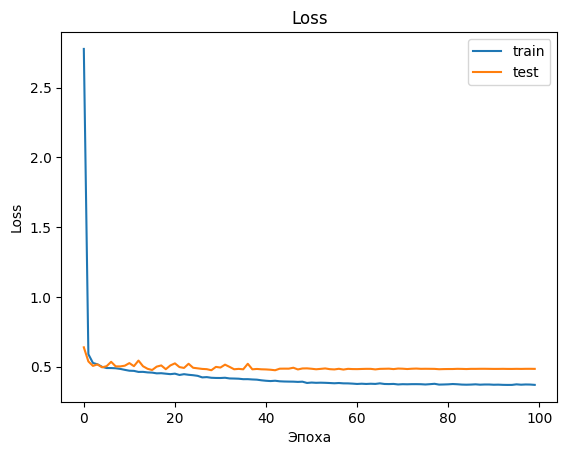

In [40]:
plt.title('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

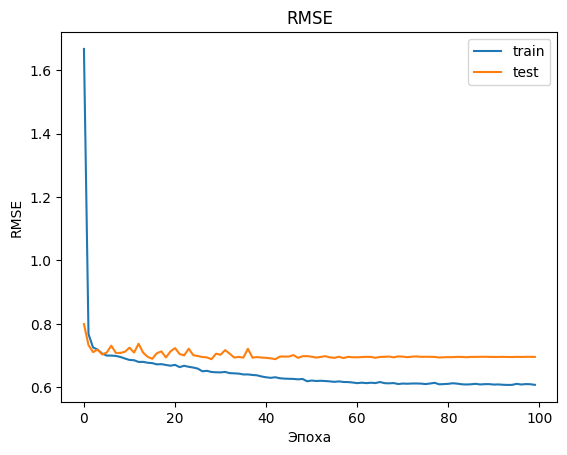

In [41]:
plt.title('RMSE')
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.xlabel('Эпоха')
plt.ylabel('RMSE')
plt.legend(['train','test'])
plt.show()

Ближе к 20 эпохе видны признаки переобучения - увеличивается ошибка на тесте и уменьшается на тренировке.

##Проверка на тесте

5. Проверьте модель на тестовых данных. Посчитайте метрики MAE, RMSE.  Постройте residual plot для результатов на тесте.

In [42]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error
y_pred = model.predict(proc_test)
y_pred = sc.inverse_transform(y_pred) #обратное масштабирование
print(y_pred.shape,y_test.shape)
y_pred=tf.squeeze(y_pred).numpy() #убираем лишнюю размерность
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("MAE:",mae)
print('RMSE:',rmse)

1472/1472 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
(47080, 1) (47080,)
MAE: 1317.8077634063695
RMSE: 2018.3974895632907


In [43]:
m=keras.models.load_model('/content/model_lb1.keras')
y_pred = m.predict(proc_test)
y_pred = sc.inverse_transform(y_pred)
y_pred=tf.squeeze(y_pred).numpy()
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("MAE для лучшей модели:",mae)
print('RMSE для лучшей модели:',rmse)

1472/1472 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
MAE для лучшей модели: 1291.4339210002838
RMSE для лучшей модели: 1997.7643711458268


In [ ]:
y_pred

In [44]:
def partial_substr(a, b, chunk_size=10000):
  residuals=np.empty_like(a)
  for i in range(0, len(a), chunk_size):
    end = min(i+chunk_size, len(a))
    residuals[i:end]=a[i:end]-b[i:end]
  return residuals

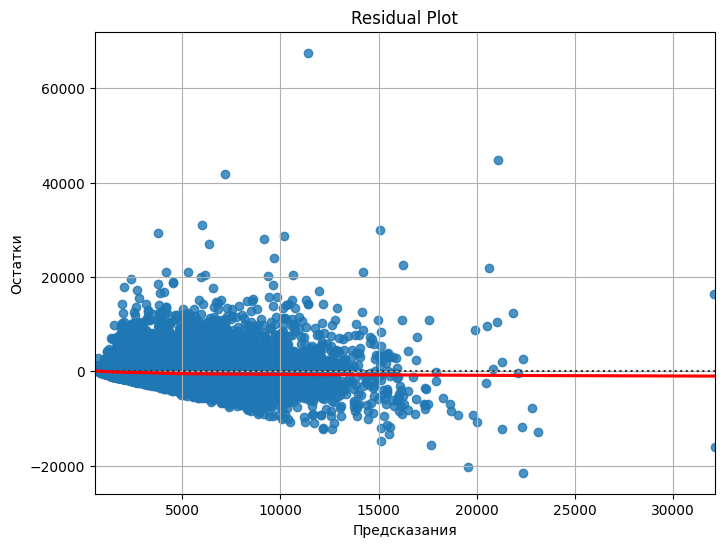

In [45]:
residuals=partial_substr(y_test,y_pred)

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Предсказания")
plt.ylabel("Остатки")
plt.title("Residual Plot")
plt.grid(True)
plt.show()